In [ ]:
import numpy as np
import pandas as pd

In [ ]:
np.random.seed(42)

In [ ]:
n_customers = 500
ages = np.random.randint(18, 65, n_customers)
genders = np.random.randint(0,2,n_customers)
income = np.random.normal(50,15,n_customers).round(2)
purchase_amount = np.random.poisson(3,n_customers)

churn = ((income<40) & (purchase_amount<100)).astype(int)

In [ ]:
df = pd.DataFrame({
    'age':ages,
    'gender':genders,
    'income':income,
    'purchase_amount':purchase_amount,
    'churn':churn
})

In [ ]:
df.to_csv("customer_data.csv",index=False)
df.head()

,age,gender,income,purchase_amount,churn
0,50,1,68.51,2,0
1,47,0,49.03,3,0
2,34,1,41.67,2,0
3,60,0,30.48,5,1
4,49,0,57.27,3,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              500 non-null    int64  
 1   gender           500 non-null    int64  
 2   income           500 non-null    float64
 3   purchase_amount  500 non-null    int64  
 4   churn            500 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 19.7 KB


In [ ]:
df.isnull().sum()

,0
age,0
gender,0
income,0
purchase_amount,0
churn,0


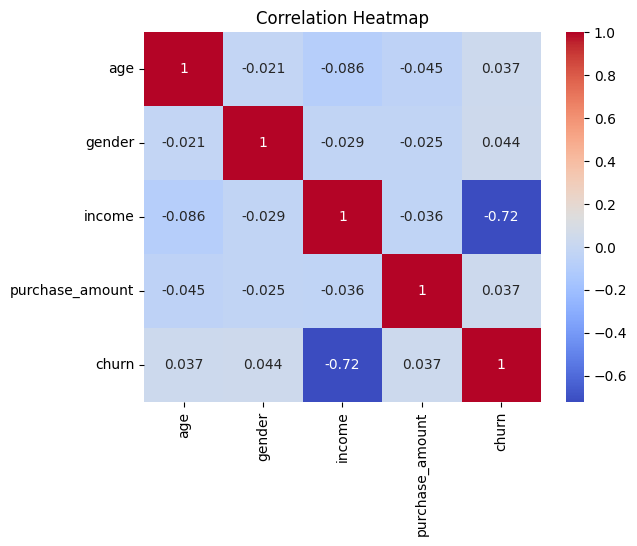

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

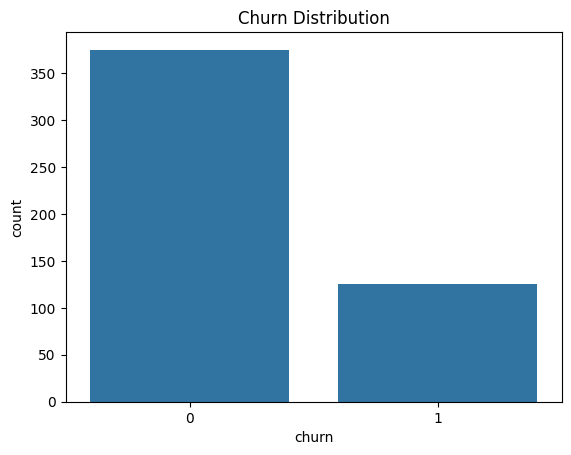

In [ ]:
sns.countplot(data=df,x='churn')
plt.title("Churn Distribution")
plt.show()

In [ ]:
x=df.drop('churn',axis=1)
y=df['churn']

In [ ]:
model = LogisticRegression()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)
print("Accuracy Score :",accuracy_score(y_test,y_pred))

Accuracy Score : 1.0


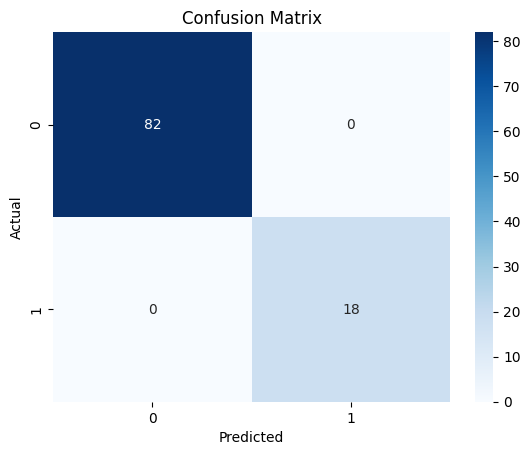

In [ ]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
print("Classification Report :",classification_report(y_test,y_pred))

Classification Report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        18

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [ ]:
new_customer = pd.DataFrame({
    'age':[28],
    'gender':[1],
    'income':[37],
    'purchase_amount':[2]
})

prediction = model.predict(new_customer)
print("Prediction :",prediction)

if prediction[0] == 1:
    print("Customer is likely to churn.")
else:
    print("Customer is likely to stay.")

Prediction : [1]
Customer is likely to churn.
